In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
#data loading
data = pd.read_csv('TestData.csv',sep=',')

In [8]:
#enlever les colonnes U0.......U20
data=data.iloc[0:,19:]

In [9]:
#verifier si les données sont valide
#data.isnull().sum()

In [10]:
#permet de rapprocher les valeurs un peu près comme normalisation
#label_Classe= LabelEncoder() 
#data['Classe']=label_Classe.fit_transform(data['Classe'])#utile pour normaliser les valeurs des classes

In [11]:
data.tail(10)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20,Classe
1549,-0.209930,-0.197209,-0.171722,-0.175851,-0.091583,-0.069204,0.009960,-0.064001,-0.056089,0.041610,...,-0.251218,-0.324264,-0.237941,0.112096,0.246644,0.304031,0.331601,0.395806,0.364297,z
1550,-0.208785,-0.202288,-0.172362,-0.182700,-0.119924,-0.060537,-0.023986,-0.019170,-0.049623,-0.060402,...,0.079753,-0.186941,-0.315902,-0.294105,-0.078377,0.179160,0.320843,0.380149,0.370377,z
1551,-0.239279,-0.276837,-0.273766,-0.286573,-0.269620,0.037867,0.038942,0.033780,-0.035604,-0.038368,...,-0.201962,-0.358062,-0.483201,-0.502034,-0.452890,-0.293834,-0.126674,0.019677,-0.041806,z
1552,-0.240425,-0.275285,-0.277477,-0.280132,-0.284248,0.038616,0.039083,0.030313,-0.044943,-0.026234,...,-0.097009,-0.333819,-0.499806,-0.498658,-0.433126,-0.302684,-0.141200,0.019710,-0.041399,z
1553,-0.241302,-0.294158,-0.268926,-0.282111,-0.279758,-0.279697,-0.174133,0.017633,0.041431,0.041655,...,0.060020,-0.045394,-0.246084,-0.497381,-0.498958,-0.431168,-0.188713,0.013082,-0.041109,z
1554,-0.241084,-0.274165,-0.279812,-0.276222,-0.290579,-0.167381,0.046375,0.035019,0.036064,-0.029173,...,0.084652,-0.003606,-0.249329,-0.464380,-0.513015,-0.432304,-0.174534,0.012073,-0.037780,z
1555,-0.180112,-0.143938,-0.076640,-0.101724,-0.104245,-0.107339,0.060986,0.130114,0.146310,0.097950,...,-0.338374,-0.685736,-0.876753,-0.899938,-0.652265,-0.209505,0.281327,0.553028,0.455613,z
1556,-0.183392,-0.159082,-0.083760,-0.099048,-0.132124,0.146692,0.155688,0.063722,-0.040865,0.000151,...,-0.825184,-0.921346,-0.749408,-0.394247,-0.208247,0.032436,0.287655,0.563066,0.467859,z
1557,-0.179445,-0.095774,-0.086842,-0.104756,-0.102207,-0.102186,0.075243,0.122891,0.164310,0.016172,...,-0.311174,-0.729209,-0.900906,-0.868288,-0.515700,-0.106863,0.336706,0.546263,0.458660,z
1558,-0.180487,-0.108782,-0.083787,-0.106321,-0.105037,-0.082467,0.075835,0.123008,0.147203,0.096781,...,-0.234696,-0.389711,-0.709722,-0.901827,-0.868920,-0.361776,0.146131,0.544894,0.476568,z


In [12]:
#permet de compter le nombre de répetition de chaque classe
data['Classe'].value_counts()

s    72
3    44
j    44
x    44
y    44
q    44
l    44
m    44
7    44
r    44
2    44
8    44
z    44
e    44
i    44
u    44
k    44
o    44
6    44
9    44
5    44
1    44
0    44
v    44
g    44
n    44
4    44
c    44
w    44
p    44
f    44
d    43
h    43
a    41
b    40
Name: Classe, dtype: int64

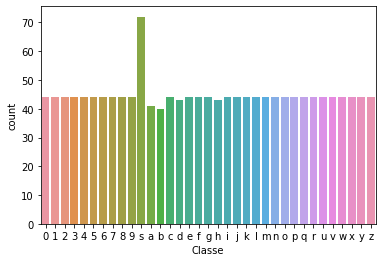

In [13]:
sns.countplot(data['Classe'])

In [14]:
X =data.drop('Classe',axis=1)  # dans x on garde toutes les colonnes sauf la classe
Y =data['Classe'] # dans y on garde la classe

In [15]:
#on divisie notre dataSet en 2 parties une pour l'entrainement et une pour le test
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=42)